## DSCI - 552 HOMEWORK 6

Using 1 late day for this assignment

Name: Varsha Kini$\quad$Github Username: Varsha-Kini$\quad$USC ID: 4013488464  

1. (a) Download the APS Failure data 

In [2]:
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

import pandas as pd
import numpy as np
# train = pd.DataFrame()
train = pd.read_csv('../Data/aps_failure_training_set.csv', skiprows = 20)
train = train.replace('na', np.nan)
test = pd.read_csv('../Data/aps_failure_test_set.csv', skiprows = 20)
test = test.replace('na', np.nan)

In [ ]:
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [ ]:
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,NaN,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,NaN,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [3]:
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

x_train = train.iloc[:, 1:]
y_train = train.iloc[:,0]
y_train = y_train.apply(lambda x: 0 if x=='neg' else 1)

x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]
y_test = y_test.apply(lambda x: 0 if x=='neg' else 1)


1. (b) Data Preparation

1. (b) i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

Ans: Mean substitution, Median substitution, Regression imputation, Maximum likelihood, etc., are usually used for dealing with data with missing values.

In [4]:
from sklearn.impute import SimpleImputer

# calculating the median of the non-missing values in a column and then replacing the missing values within each column

imp_median = SimpleImputer(strategy='median')
imp_median.fit(x_train)
updated_train = pd.DataFrame(imp_median.transform(x_train),columns=x_train.columns)
updated_test = pd.DataFrame(imp_median.transform(x_test),columns=x_test.columns)

In [ ]:
updated_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [ ]:
updated_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


1. (b) ii. For each of the 170 features, calculate the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean

In [ ]:
coeff_CV = pd.DataFrame(updated_train.apply(lambda x: np.std(x) / np.mean(x)))
coeff_CV.columns = ["Coefficient of Variation for the Training set"]
coeff_CV

,Coefficient of Variation for the Training set
aa_000,2.450917
ab_000,10.383407
ac_000,2.310221
ad_000,244.320780
ae_000,24.199935
...,...
ee_007,5.012712
ee_008,3.259052
ee_009,5.691565
ef_000,49.366248


1. (b) iii. Plot a correlation matrix for your features using pandas or any other tool

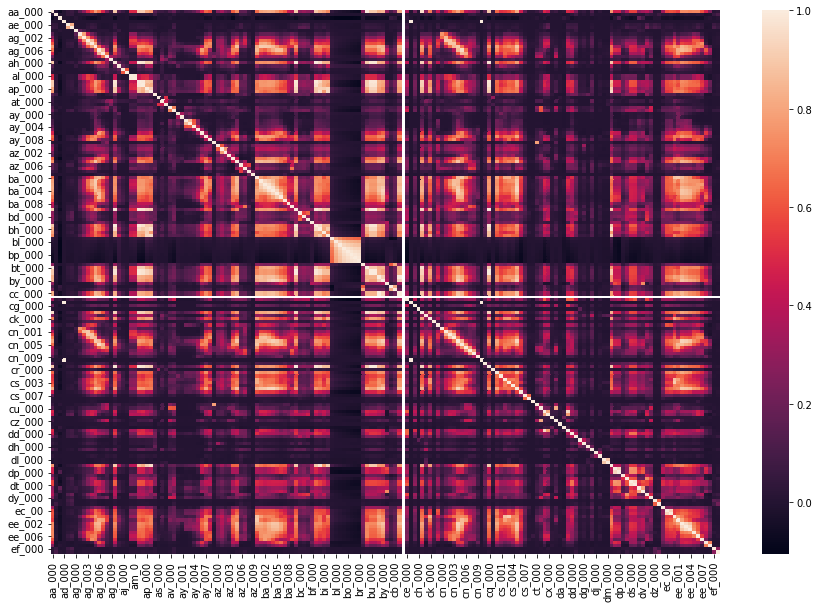

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(updated_train.corr())
plt.show()

1. (b) iv. Pick $\sqrt{170}$ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [ ]:
# Reference: https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6
import math 

coeff_CV = coeff_CV.sort_values("Coefficient of Variation for the Training set", ascending=False)
highest_CV = math.floor(math.sqrt(170))
top = coeff_CV.iloc[:highest_CV,:]
list_col = updated_train[list(top.index.values)]
top

,Coefficient of Variation for the Training set
cf_000,244.885476
co_000,244.505347
ad_000,244.320780
cs_009,237.928571
dh_000,123.215070
dj_000,117.493246
ag_000,92.916981
as_000,87.331772
ay_009,84.733028
ak_000,80.424305


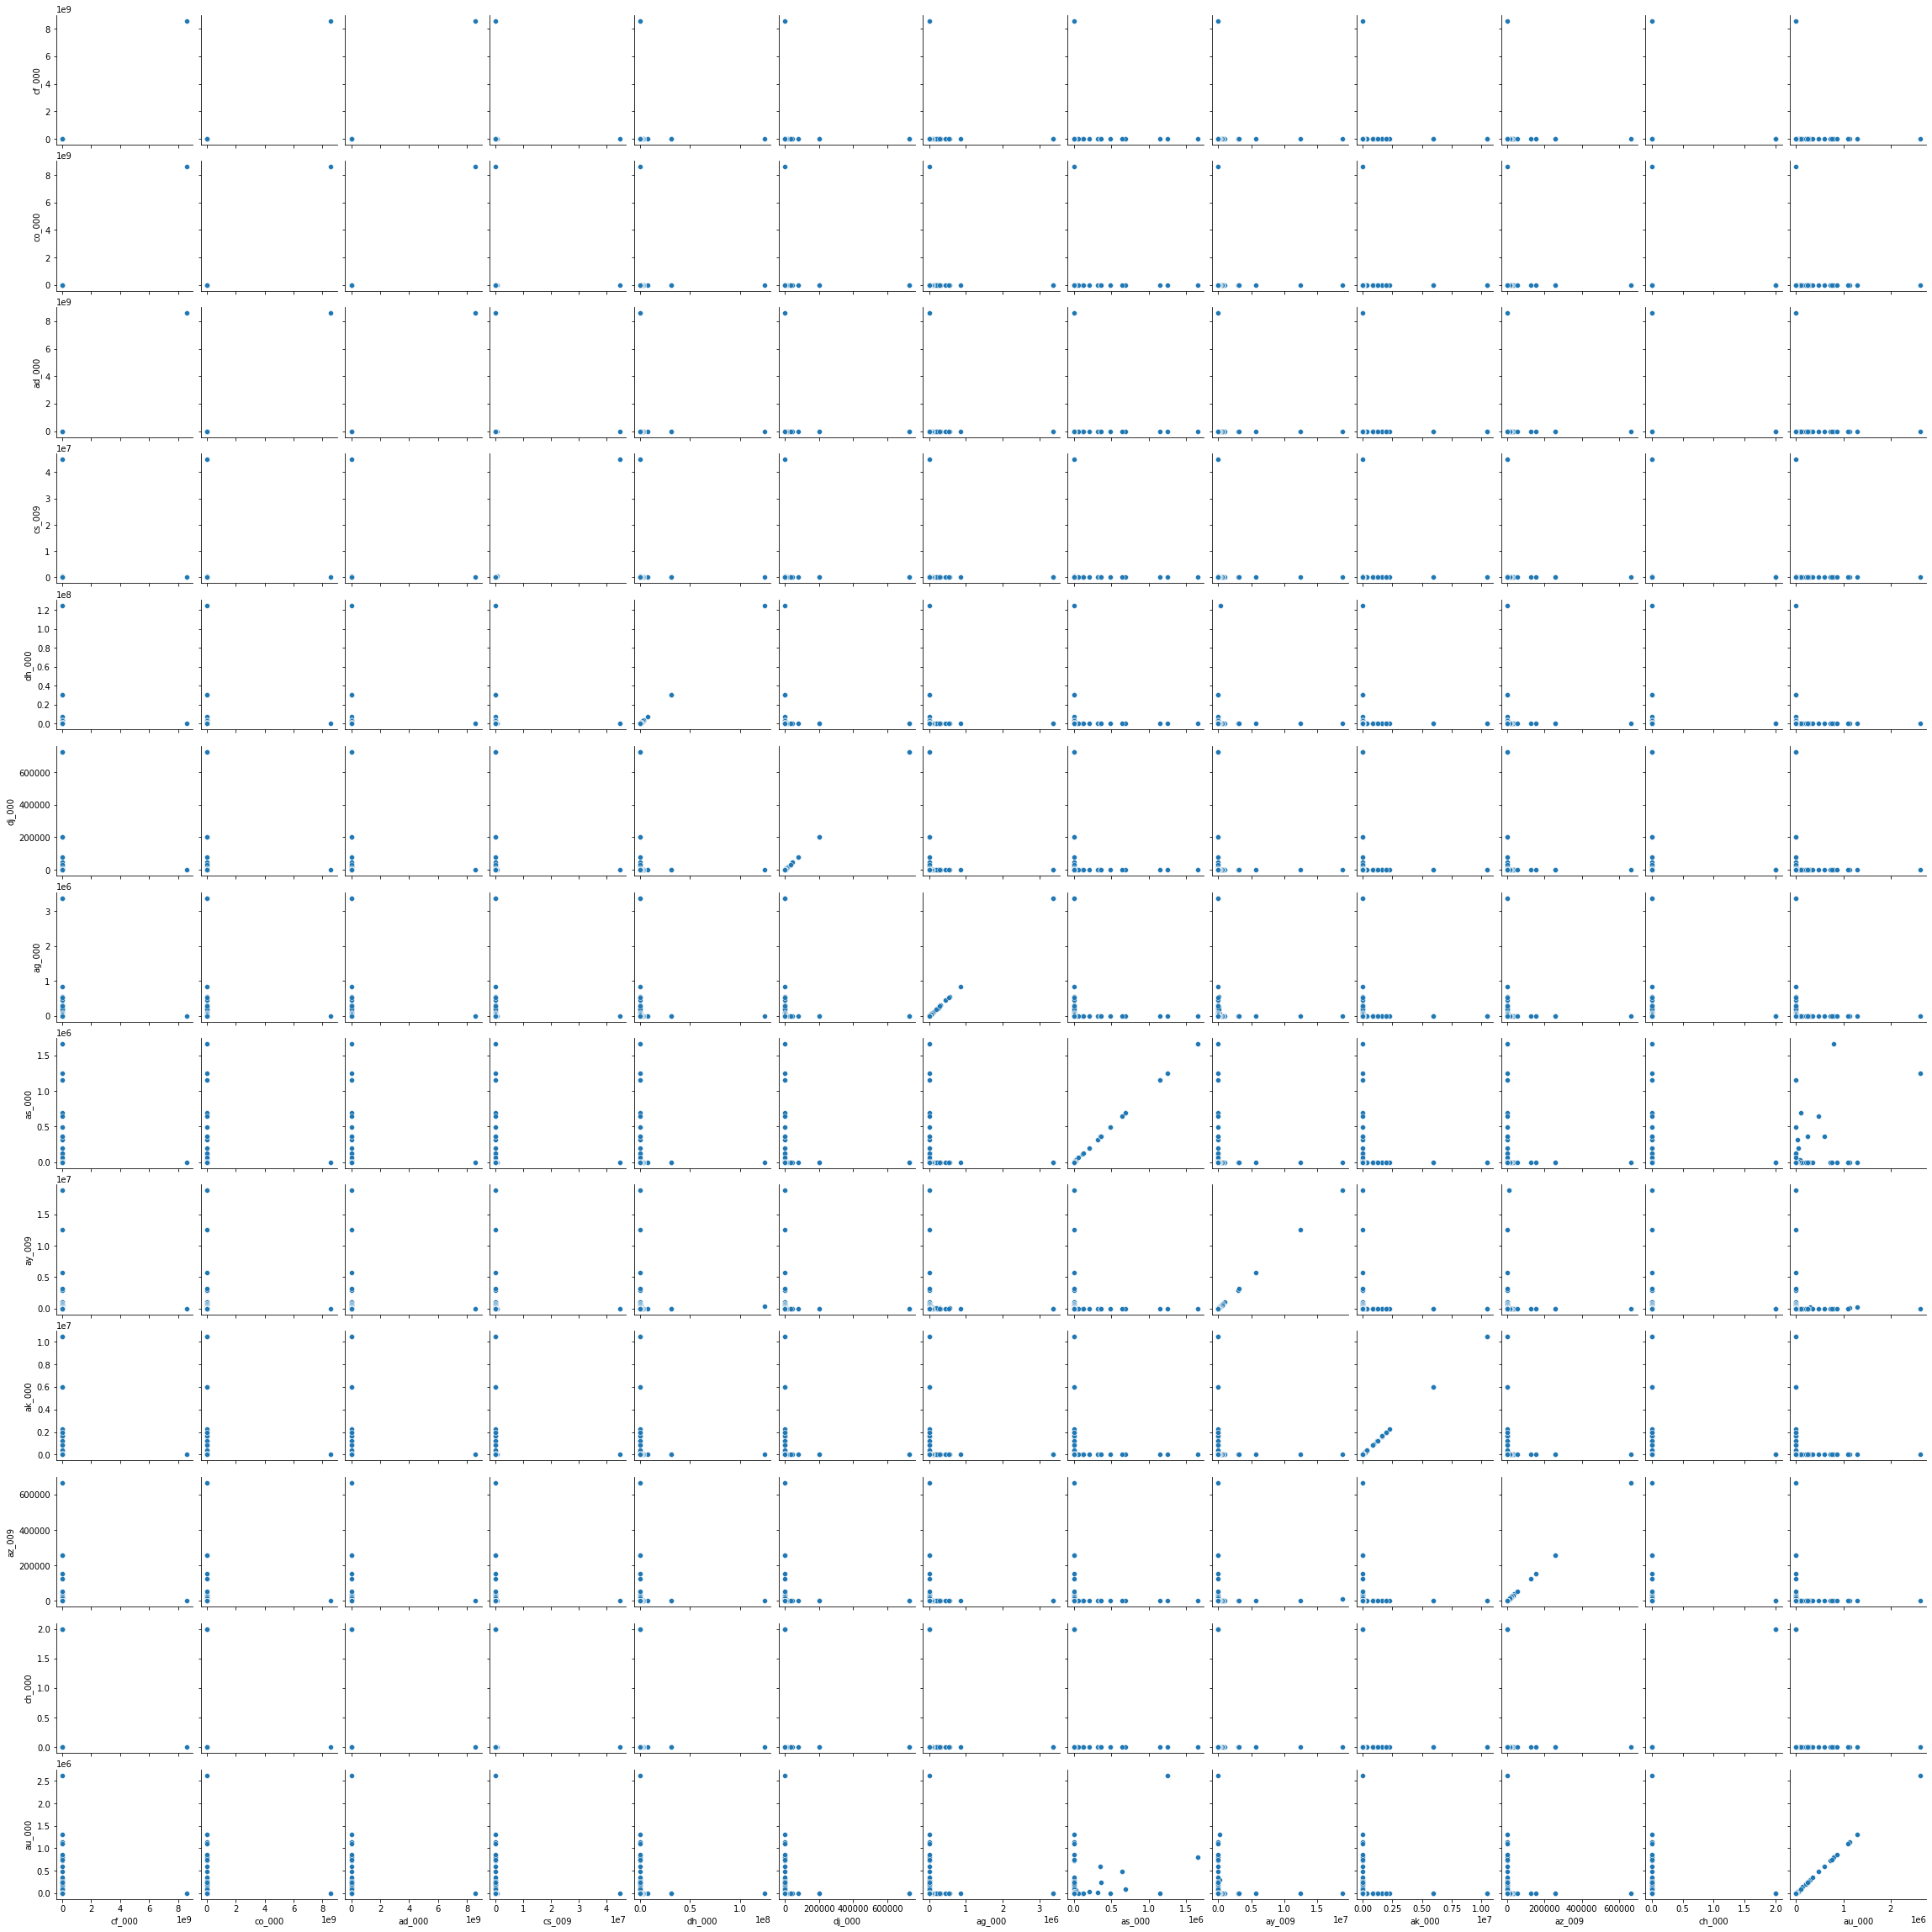

In [ ]:
sns.pairplot(list_col, diag_kind = None)
plt.show()

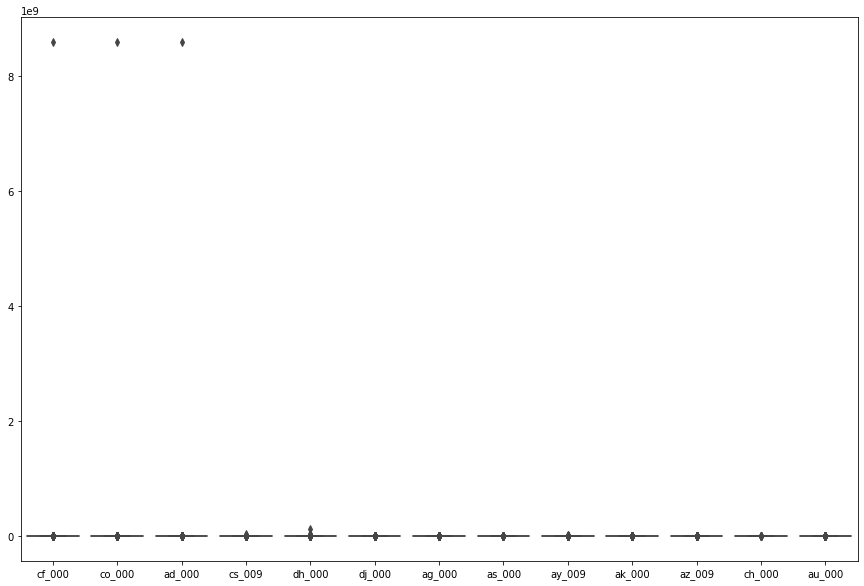

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data = list_col)

It is not possible to draw conclusions about the significance of the features from just the scatterplots and boxplots

1. (b) v. Determine the number of positive and negative data. Is this data set imbalanced?

In [ ]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html
y_train.value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

0    15625
1      375
Name: class, dtype: int64

It can be seen from the number of positive and negative entries in the dataset that the dataset is imbalanced.

1. (c) Train a random forest to classify the data set. DO NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them. Calculate Out of Bag error estimate for your random forset and compare it to the test error.

True Positive rate is 1.0
True Negative rate is 1.0


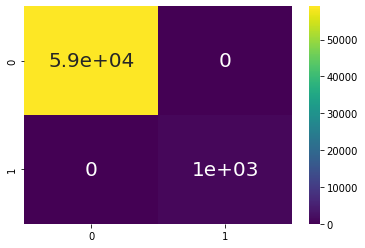

In [ ]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=0, oob_score=True).fit(updated_train, y_train)
prediction = model.predict(updated_train)
con_mat=confusion_matrix(y_train, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()


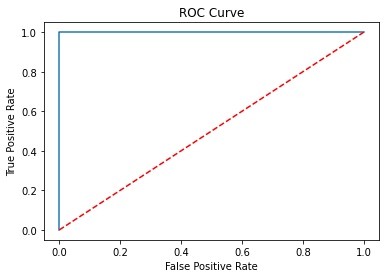

Area Under Curve: 1.0
AUC score for train data is: 1.0
Misclassification rate for train data is: 0.0


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

probs = model.predict_proba(updated_train)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_train, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))
print("AUC score for train data is:", roc_auc_score(y_train, probs))
print("Misclassification rate for train data is:", 1 - model.score(updated_train, y_train))

True Positive rate is 0.7253333333333334
True Negative rate is 0.99904


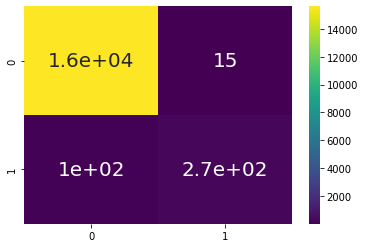

In [ ]:
model = RandomForestClassifier(random_state=0, oob_score=True).fit(updated_train, y_train)
prediction = model.predict(updated_test)
con_mat=confusion_matrix(y_test, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

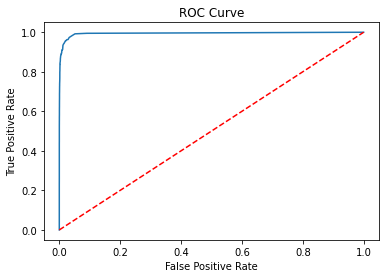

Area Under Curve: 0.9943537493333334
AUC score for test data is: 0.9943537493333334
Misclassification rate for test data is: 0.00737500000000002


In [ ]:
probs = model.predict_proba(updated_test)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_test, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))
print("AUC score for test data is:", roc_auc_score(y_test, probs))
test_error = 1 - model.score(updated_test, y_test)
print("Misclassification rate for test data is:", test_error)

In [ ]:
# Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#:~:text=The%20out%2Dof%2Dbag%20(,whilst%20being%20trained%20%5B1%5D.

oob_error = 1 - model.oob_score_
print("Out of bag error for training data: ", oob_error)
print("Test error rate for training data: ", test_error)

Out of bag error for training data:  0.006166666666666654
Test error rate for training data:  0.00737500000000002


Out of bag error is better than the test error rate

1. (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

True Positive rate is 1.0
True Negative rate is 1.0


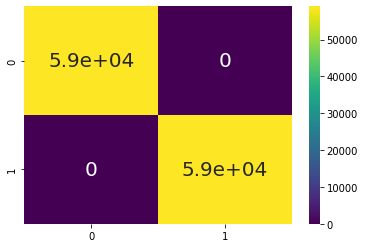

In [ ]:
# Reference: https://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf
# Reference: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(updated_train, y_train.ravel())
model = RandomForestClassifier(random_state=0, oob_score=True).fit(X_train_smote, y_train_smote)
prediction = model.predict(X_train_smote)
con_mat=confusion_matrix(y_train_smote, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

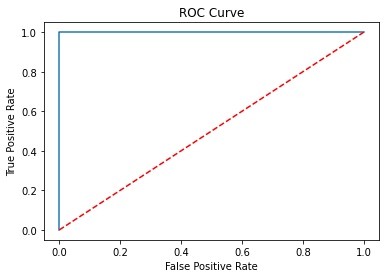

Area Under Curve: 1.0
AUC score for train data is: 1.0
Misclassification rate for train data is: 0.0


In [ ]:
probs = model.predict_proba(X_train_smote)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_train_smote, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))
print("AUC score for train data is:", roc_auc_score(y_train_smote, probs))
test_error = 1 - model.score(X_train_smote, y_train_smote)
print("Misclassification rate for train data is:", test_error)

True Positive rate is 0.949056
True Negative rate is 0.994624


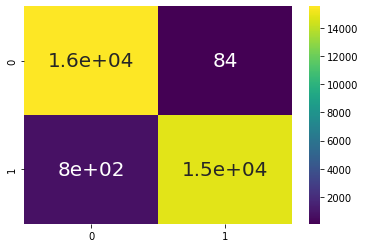

In [ ]:
X_test_smote, y_test_smote = sm.fit_resample(updated_test, y_test.ravel())
prediction = model.predict(X_test_smote)
con_mat=confusion_matrix(y_test_smote, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

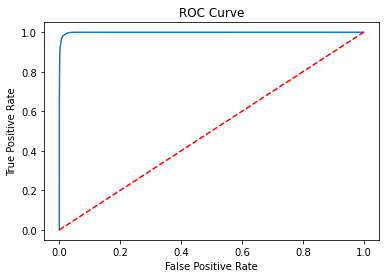

Area Under Curve: 0.998843383808
AUC score for test data is: 0.998843383808
Misclassification rate for test data is: 0.028159999999999963


In [ ]:
probs = model.predict_proba(X_test_smote)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_test_smote, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))
print("AUC score for test data is:", roc_auc_score(y_test_smote, probs))
test_error = 1 - model.score(X_test_smote, y_test_smote)
print("Misclassification rate for test data is:", test_error)

1. (e) XGBoost and Model Trees

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
alphas = [10**i for i in range(-3,4)]

In [ ]:
# Reference: 
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
error = []
alpha = []
for i in alphas:
    model = xgb.XGBClassifier(objective = 'binary:logistic', alpha = i)
    kfold = KFold(n_splits=5, shuffle=True)
    kf_cv_scores = cross_val_score(model, updated_train, y_train, cv=kfold )
    error.append(abs(kf_cv_scores.mean()))
    alpha.append(i)

print("The value of alpha determined by cross validation: ")
alpha_min = alpha[error.index(min(error))]
print(alpha_min)


The value of alpha determined by cross validation: 
0.01


In [ ]:
import sklearn.metrics as metrics
model = xgb.XGBClassifier(objective = 'binary:logistic', alpha = alpha_min).fit(updated_train, y_train)
prediction = model.predict(updated_train)
error = metrics.mean_squared_error(y_train, prediction)
print("Error on train data for XGBoost Regressor is: ", error)

Error on train data for XGBoost Regressor is:  0.004683333333333334


True Positive rate is 0.764
True Negative rate is 0.9992372881355932


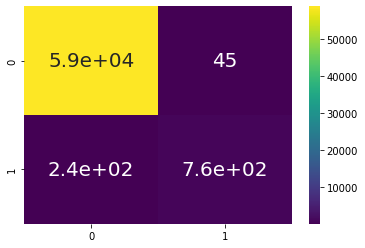

In [ ]:
con_mat=confusion_matrix(y_train, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

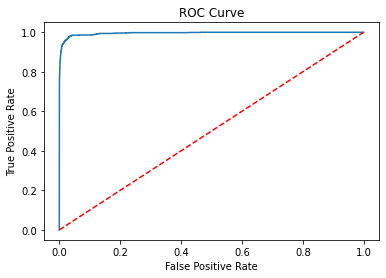

Area Under Curve: 0.9954675508474576
AUC score for train data is: 0.9954675508474576
Misclassification rate for train data is: 0.004683333333333373


In [ ]:
probs = model.predict_proba(updated_train)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_train, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))
print("AUC score for train data is:", roc_auc_score(y_train, probs))
test_error = 1 - model.score(updated_train, y_train)
print("Misclassification rate for train data is:", test_error)

In [ ]:
prediction = model.predict(updated_test)
error = metrics.mean_squared_error(y_test, prediction)
print("Error on test data for XGBoost Regressor is: ", error)

Error on test data for XGBoost Regressor is:  0.0086875


True Positive rate is 0.6826666666666666
True Negative rate is 0.99872


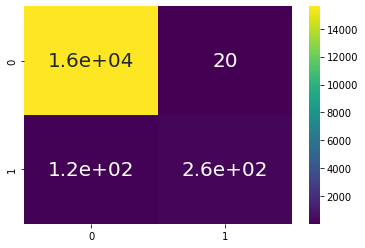

In [ ]:
con_mat=confusion_matrix(y_test, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

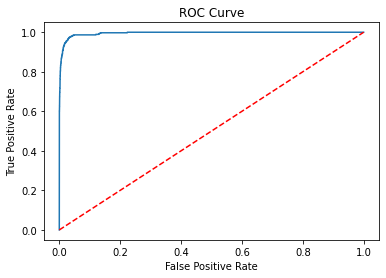

Area Under Curve: 0.9950931626666666
AUC score for test data is: 0.9950931626666666
Misclassification rate for test data is: 0.00868749999999996


In [ ]:
probs = model.predict_proba(updated_test)
probs = probs[:, 1]
FP, TP, threshold = roc_curve(y_test, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(auc(FP, TP)))
print("AUC score for test data is:", roc_auc_score(y_test, probs))
test_error = 1 - model.score(updated_test, y_test)
print("Misclassification rate for test data is:", test_error)

1. (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not
forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case

In [5]:
alphas = [10**i for i in range(-3,4)]

In [6]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(updated_train, y_train.ravel())
error = []
alpha = []
for i in alphas:
    model = xgb.XGBClassifier(objective = 'binary:logistic', alpha = i)
    kfold = KFold(n_splits=5, shuffle=True)
    kf_cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold )
    error.append(abs(kf_cv_scores.mean()))
    alpha.append(i)

print("The value of alpha determined by cross validation: ")
alpha_min = alpha[error.index(min(error))]
print(alpha_min)


The value of alpha determined by cross validation: 
10


In [7]:
import sklearn.metrics as metrics
model = xgb.XGBClassifier(objective = 'binary:logistic', alpha = alpha_min).fit( X_train_smote, y_train_smote)
prediction = model.predict( X_train_smote)
error = metrics.mean_squared_error(y_train_smote, prediction)
print("Error on train data for XGBoost Regressor is: ", error)

Error on train data for XGBoost Regressor is:  0.014805084745762712


True Positive rate is 0.9885593220338983
True Negative rate is 0.9818305084745763


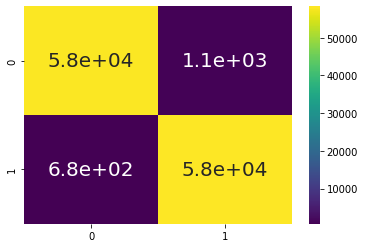

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
con_mat=confusion_matrix(y_train_smote, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

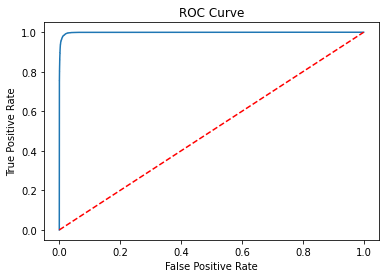

Area Under Curve: 0.9988898766159149
AUC score for train data is: 0.9988898766159149
Misclassification rate for train data is: 0.014805084745762698


In [9]:
probs = model.predict_proba( X_train_smote)
probs = probs[:, 1]
FP, TP, threshold = metrics.roc_curve(y_train_smote, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(metrics.auc(FP, TP)))
print("AUC score for train data is:", metrics.roc_auc_score(y_train_smote, probs))
test_error = 1 - model.score(X_train_smote, y_train_smote)
print("Misclassification rate for train data is:", test_error)

In [10]:
X_test_smote, y_test_smote = sm.fit_resample(updated_test, y_test.ravel())
prediction = model.predict(X_test_smote)
error = metrics.mean_squared_error(y_test_smote, prediction)
print("Error on test data for XGBoost Regressor is: ", error)

Error on test data for XGBoost Regressor is:  0.015136


True Positive rate is 0.9872
True Negative rate is 0.982528


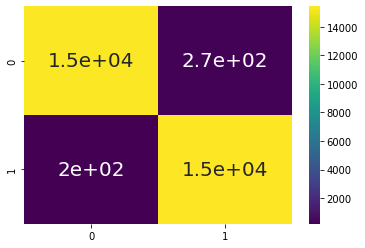

In [11]:
con_mat=confusion_matrix(y_test_smote, prediction)
TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]
TP_rate = TP/(TP + FN)
TN_rate = TN/(TN + FP)
print("True Positive rate is", TP_rate)
print("True Negative rate is", TN_rate)
sns.heatmap(con_mat,annot=True,annot_kws= {"size":20},cmap="viridis")
plt.show()

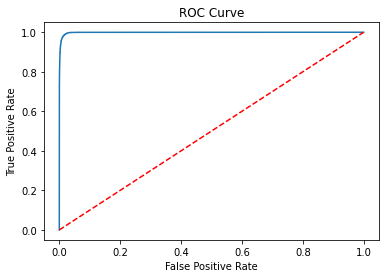

Area Under Curve: 0.9988403978239999
AUC score for train data is: 0.9988403978239999
Misclassification rate for train data is: 0.015136000000000038


In [12]:
probs = model.predict_proba( X_test_smote)
probs = probs[:, 1]
FP, TP, threshold = metrics.roc_curve(y_test_smote, probs)
plt.plot(FP, TP)
plt.plot([0, 1], [0, 1], 'k--',color="red",)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()
print("Area Under Curve: " + str(metrics.auc(FP, TP)))
print("AUC score for train data is:", metrics.roc_auc_score(y_test_smote, probs))
test_error = 1 - model.score(X_test_smote, y_test_smote)
print("Misclassification rate for train data is:", test_error)

Training error and testing error is better in the uncompensated case rather than the SMOTE case.

2. ISLR 6.6.3

(a) (iv) Steadily decreases

As s increases from 0, βs that minimizes the RSS also increase from 0 to their least square estimate values. As a result, RSS will monotonically decrease

(b) Decrease initially, and then eventually start increasing in a U shape

We have a null model when the value of s is zero. As s increases from 0, the model becomes more flexible. As a result, the test RSS will decrease. Once we encounter an overfit, the test RSS will start increasing again.

(c) (iii) Steadily increase

As s increases from zero, there is a reduction in the shrinkage parameter. As a result, there is an increase in the model flexibility. With increase in flexibility, there is an increase in variance.

(d) (iv) Steadily decrease

As s increases from zero, there is a reduction in the shrinkage parameter. As a result, there is an increase in the model flexibility. With increase in flexibility, there is a decrease in the bias.

(e) (v) Remains constant
Irreducible error are the unmeasured variables not in X and therefore it is model independent and remains constant.



3. ISLR 6.6.5

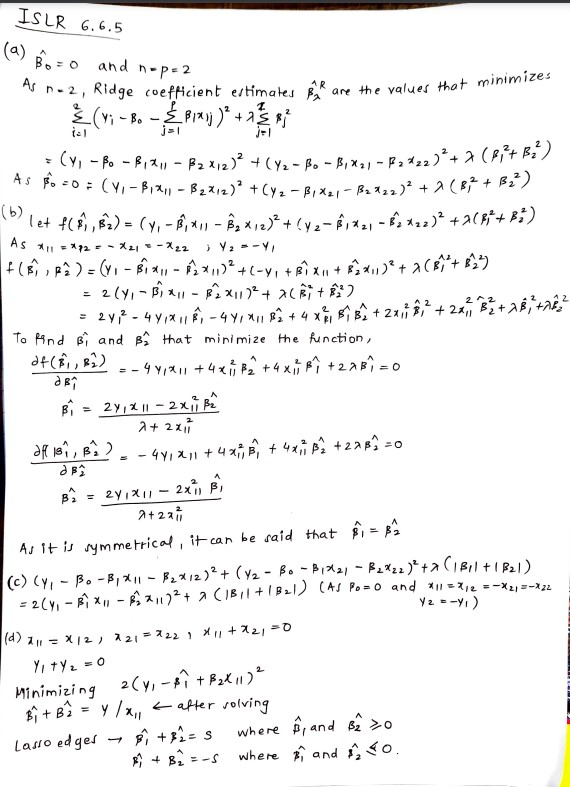

.
4. ISLR 8.4.5

Ans: 

sum((0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75) >= 0.5) > sum((0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75) < 0.5) -> TRUE
The final classification is red as the number of red predictions is more than the number of green predictions based on a 50% threshold.

mean((0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)) -> 0.45
The mean is less than the 50% of the threshold, so final classification is green.

5. ISLR 9.7.3

a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

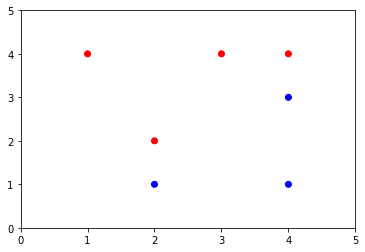

In [13]:
x1 = np.array([3, 2, 4, 1, 2, 4, 4])
x2 = np.array([4, 2, 4, 4, 1, 3, 1])
label = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c = label)
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

b)Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

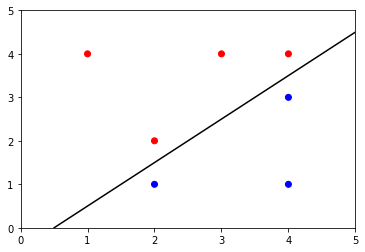

In [14]:
plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([0.5, 5], [0, 4.5], 'k-')
label = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c = label )
plt.show()

c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

Ans. Classify to Blue if X1 − X2 − 0.5 > 0, and classify to Red otherwise.

d) On your sketch, indicate the margin for the maximal margin hyperplane.

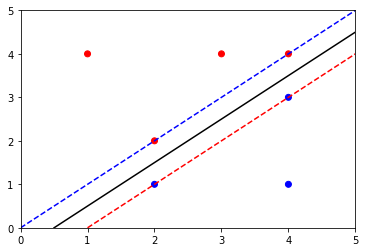

In [15]:
plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([1,5],[0,4], 'r--')
plt.plot([0,5],[0,5], 'b--')
plt.plot([0.5, 5], [0, 4.5], 'k-')
label = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c = label)
plt.show()

e) Indicate the support vectors for the maximal margin classifier.

Ans: The support vectors are (2,1), (2,2), (4,3) and (4,4)

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

Ans: The seventh observation is not a support vector. The maximal margin will not be influenced by any slight movement of this observation.

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

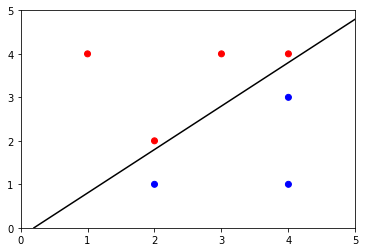

In [16]:
plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([0.2, 5], [0, 4.8], 'k-')
label = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c = label)
plt.show()

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

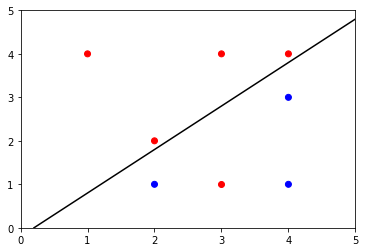

In [17]:
plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([0.2, 5], [0, 4.8], 'k-')
plt.scatter([3], [1], c = ["red"])
label = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c = label)
plt.show()